# Exercises: HP Spectral-Spatial RF Pulse Design




In [ ]:
% If you have any questions about these exercises, please let us know.
% Xiaoxi Liu (Xiaoxi.Liu@ucsf.edu)
% Peder Larson (Peder.Larson@ucsf.edu)

## Install code, setup path
To run this code you will need to clone the hyperpolarized MRI toolbox repository from github and add it to your matlab path. This can be done with the following command: 'git clone https://github.com/LarsonLab/hyperpolarized-mri-toolbox/'

Then run the 'startup' function to setup the appropriate paths

In [ ]:
% setup hyperpolarized-mri-toolbox
cd ../
if exist('startup.m')
    startup
else
    cd ../
    startup
end

## Exercise: Design a SPSP RF Pulse for C1-Pyruvate

In [ ]:
% Design a single band pulse for a metabolite specific C1-pyruvate imaging on a 3T scanner. 

% The peaks include bicarbonate (-322Hz), pyruvate (0Hz), alanine (185Hz), pyruvate hydrate (270Hz), lactate (395Hz).

% Considering B0 inhomogeneity when setting passband frequency

In [ ]:
% GENERAL PULSE PARAMETERS
ss_type = 'Flyback Half';
ptype = 'ex';  % excitation pulse
opt = ss_opt({'Nucleus', 'Carbon', ...
	      'Max Duration', 25e-3, ...
          'Spect Correct', 1});
          
% SPECTRAL PULSE PARAMETERS  - large pass/stop bands chosen for wide
% supression regions
B0 = 3e4; % G
df = 0.5e-6 * B0 * SS_GAMMA; 
% metabolite			frequency (Hz)		freq bandwidth (Hz)		flip angle (deg)
mets(1).name = 'bic'; 	mets(1).f = -322; 	mets(1).df = 2*df;      mets(1).ang = 0; 
mets(2).name = 'pyr'; 	mets(2).f = 0;   	mets(2).df = 2*df; 		mets(2).ang = 90; 
mets(3).name = 'ala'; 	mets(3).f = 185; 	mets(3).df = 2*df;      mets(3).ang = 0; 
mets(4).name = 'pyrh'; 	mets(4).f = 270; 	mets(4).df = 2*df; 		mets(4).ang = 0; 
mets(5).name = 'lac'; 	mets(5).f = 395; 	mets(5).df = 2*df;      mets(5).ang = 0; 
mets(6).name = 'bic2ala'; 	mets(6).f = 717; 	mets(6).df = 2*df;      mets(6).ang = 0; 

% create vectors of angles, ripples, and band edges for input to pulse design
[fspec, a_angs, d] = create_freq_specs(mets,0);
fctr = 0; 
s_ftype = 'min';  % min-phase spectral 

% SPATIAL PULSE PARAMETERS
z_thk = 1.2;  % thickness (cm)
z_tb = 2; % time-bandwidth
z_ftype='ls';  % least-squares filter design
z_d1 = 0.01;  z_d2 = 0.01;  % slice profile pass and stop-band ripples, respectively

% DESIGN THE PULSE!
[g,rf,fs,z,f,mxy] = ...
    ss_design(z_thk, z_tb, [z_d1 z_d2], fspec, a_angs, d, ptype, ...
	      z_ftype, s_ftype, ss_type, fctr);
set(gcf,'Name', '[1-13C]lac only for 3T clinical system, avoiding urea');

In [ ]:
Which pulse would you like to use? (leave empty for shortest pulse) 1
Returning Fs:  868.1 B1: 0.213G Power: 2.898e-05 G^2 ms Dur: 19.4ms

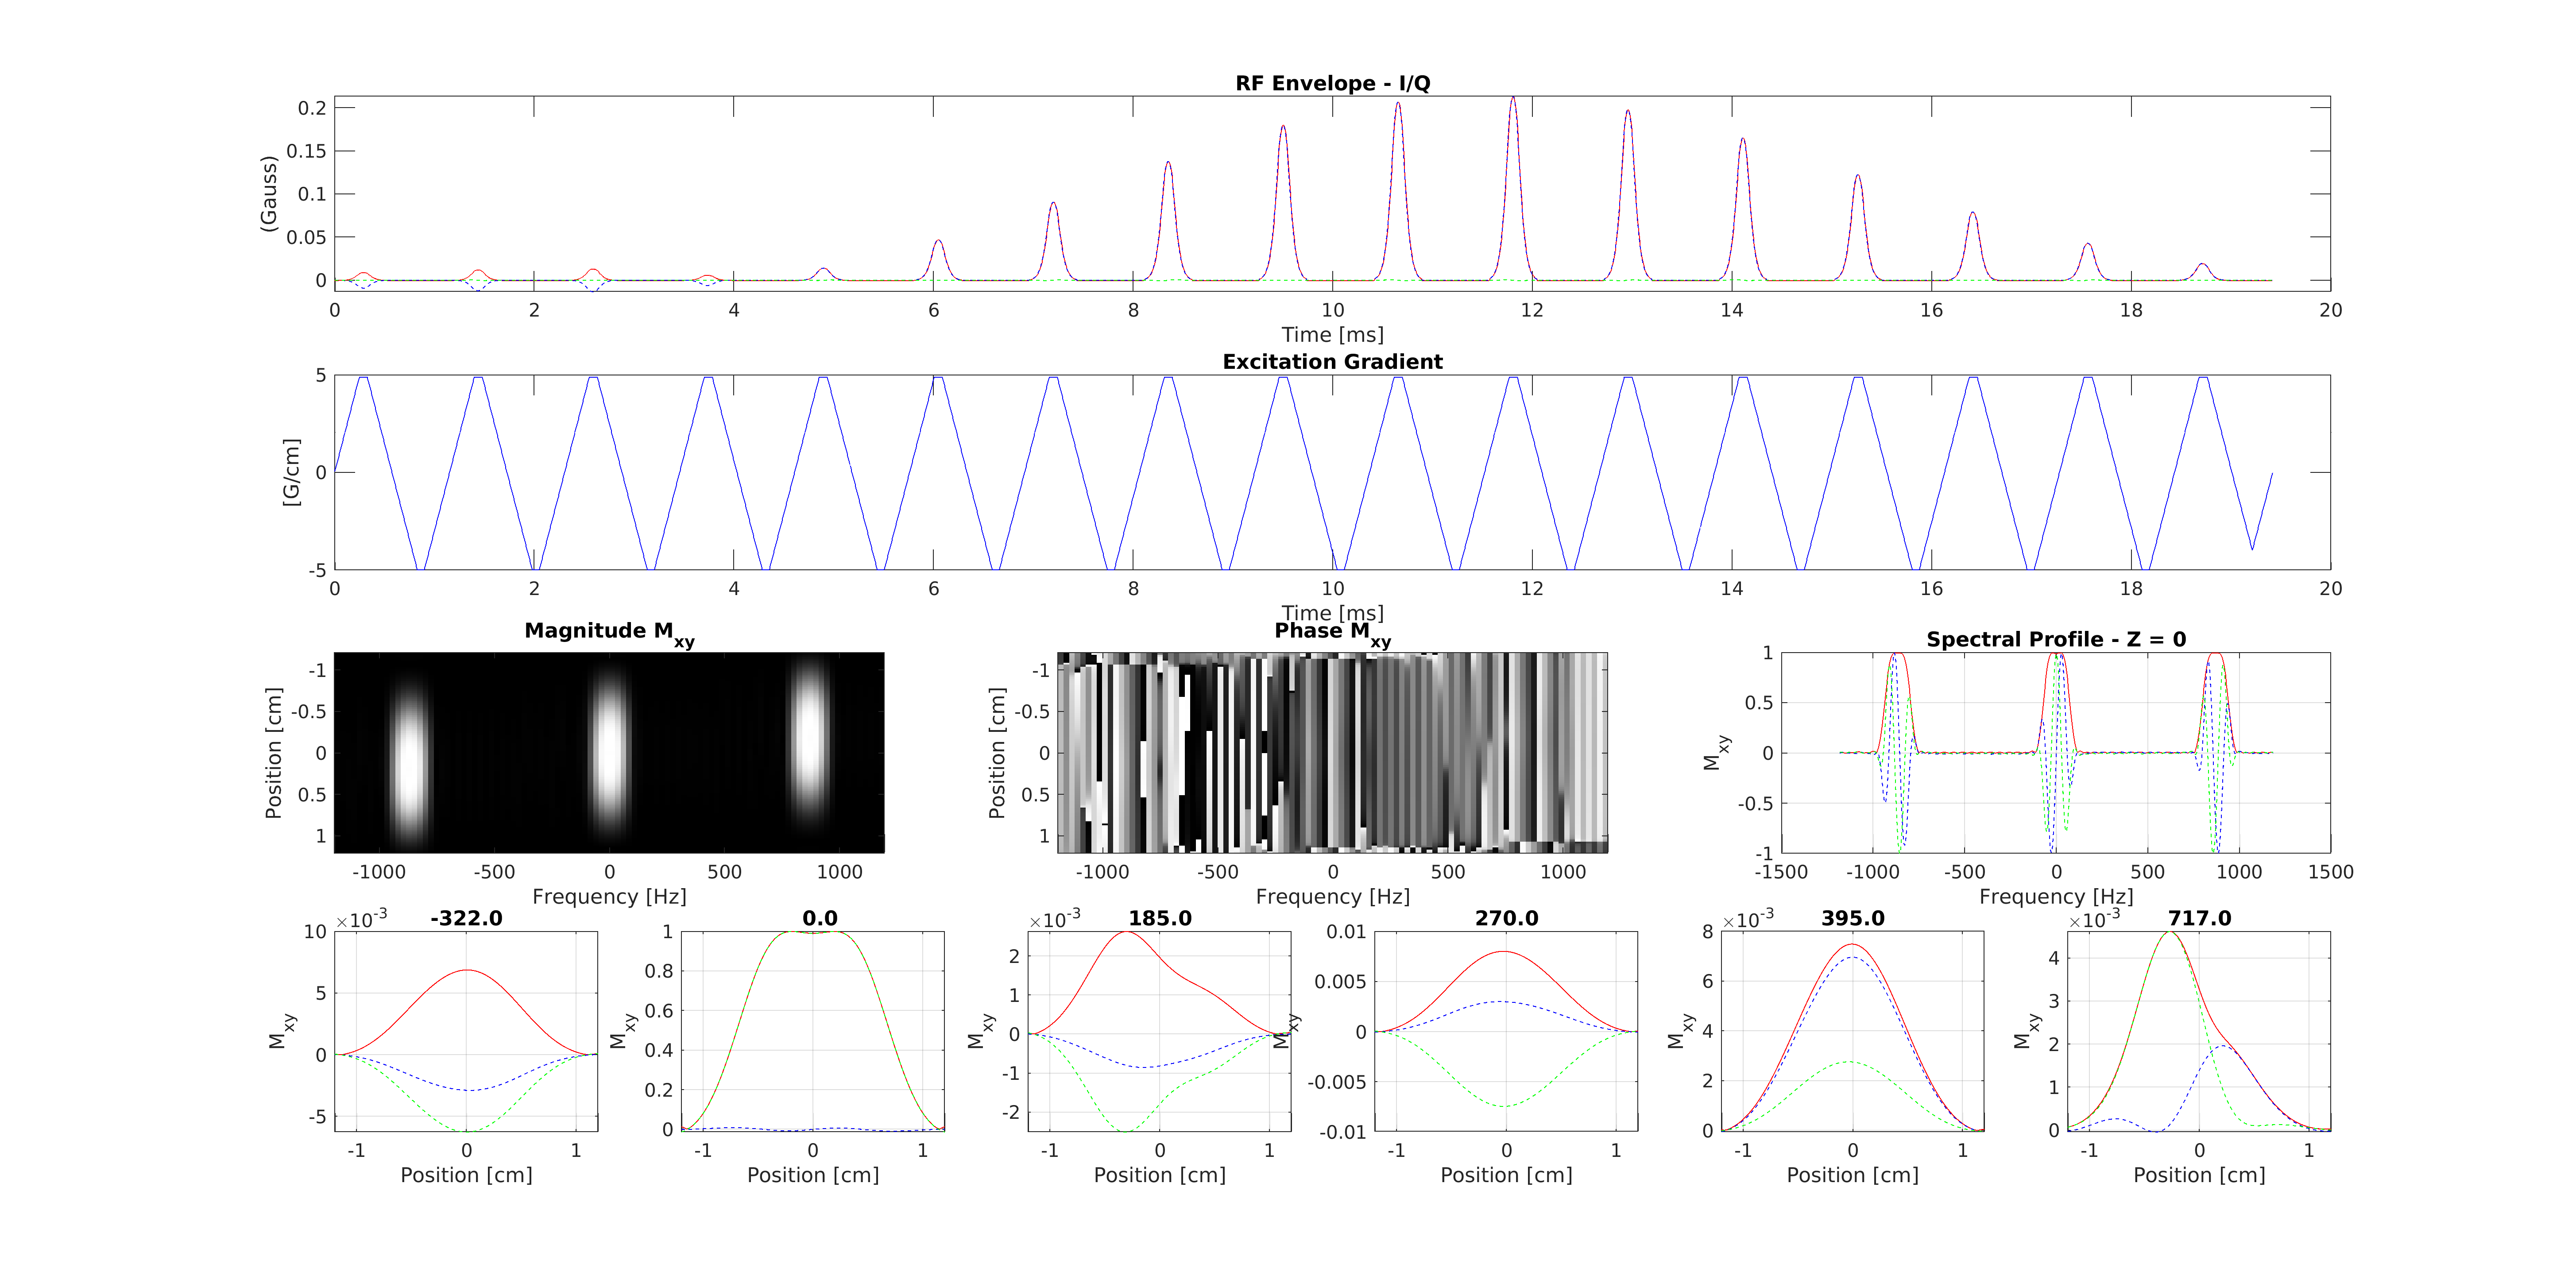

In [ ]:
% Next step, can you reduce the slice thickness?

## Exercise: Design a SPSP RF Pulse for C1-alpha-ketoglutarate


In [ ]:
% Design a single band pulse for a metabolite specific C1-aKG imaging on a 3T scanner. 

% The peaks include aKG (0Hz), glutamate (142Hz), aKG hydrate (253Hz), 2HG (368Hz).

% Considering B0 inhomogeneity when setting passband frequency

In [ ]:
% GENERAL PULSE PARAMETERS
ss_type = 'Flyback Half';
ptype = 'ex';  % excitation pulse
opt = ss_opt({'Nucleus', 'Carbon', ...
	      'Max Duration', 25e-3, ...
          'Spect Correct', 1});
          
% SPECTRAL PULSE PARAMETERS  - large pass/stop bands chosen for wide
% supression regions
B0 = 3e4; % G% 0.5 ppm = gamma_C13 * B0 * 0.5e-6
% metabolite			frequency (Hz)		freq bandwidth (Hz)		flip angle (deg)
mets(1).name = 'C1aKG'; mets(1).f = 0; 	mets(1).df = 2*df;      mets(1).ang = 90; 
mets(2).name = 'glut'; 	mets(2).f = 143;   	mets(2).df = 2*df; 		mets(2).ang = 0; 
mets(3).name = 'aKGh'; 	mets(3).f = 253; 	mets(3).df = 2*df;      mets(3).ang = 0; 
mets(4).name = '2HG'; 	mets(4).f = 368; 	mets(4).df = 2*df; 		mets(4).ang = 0; 
mets(5).name = 'akg2hdr'; 	mets(5).f = 225; 	mets(5).df = 2*df;      mets(5).ang = 0; 

% create vectors of angles, ripples, and band edges for input to pulse design
[fspec, a_angs, d] = create_freq_specs(mets,0);
fctr = 0;  % force pulse design to optimize for center of frequency specification
s_ftype = 'min';  % minimum-phase spectral filter

% SPATIAL PULSE PARAMETERS
z_thk = 1;  % thickness (cm)
z_tb = 2; % time-bandwidth
z_ftype='ms';  % hamming windowed filter design
z_d1 = 0.01;  z_d2 = 0.01;  % slice profile pass and stop-band ripples, respectively

% DESIGN THE PULSE!
[g,rf,fs,z,f,mxy] = ...
    ss_design(z_thk, z_tb, [z_d1 z_d2], fspec, a_angs, d, ptype, ...
	      z_ftype, s_ftype, ss_type, fctr);
set(gcf,'Name', '[1-13C]lac only for 3T clinical system, avoiding urea');

In [ ]:
Which pulse would you like to use? (leave empty for shortest pulse) 7
Returning Fs:  559.3 B1: 0.091G Power: 9.568e-06 G^2 ms Dur: 15.9ms

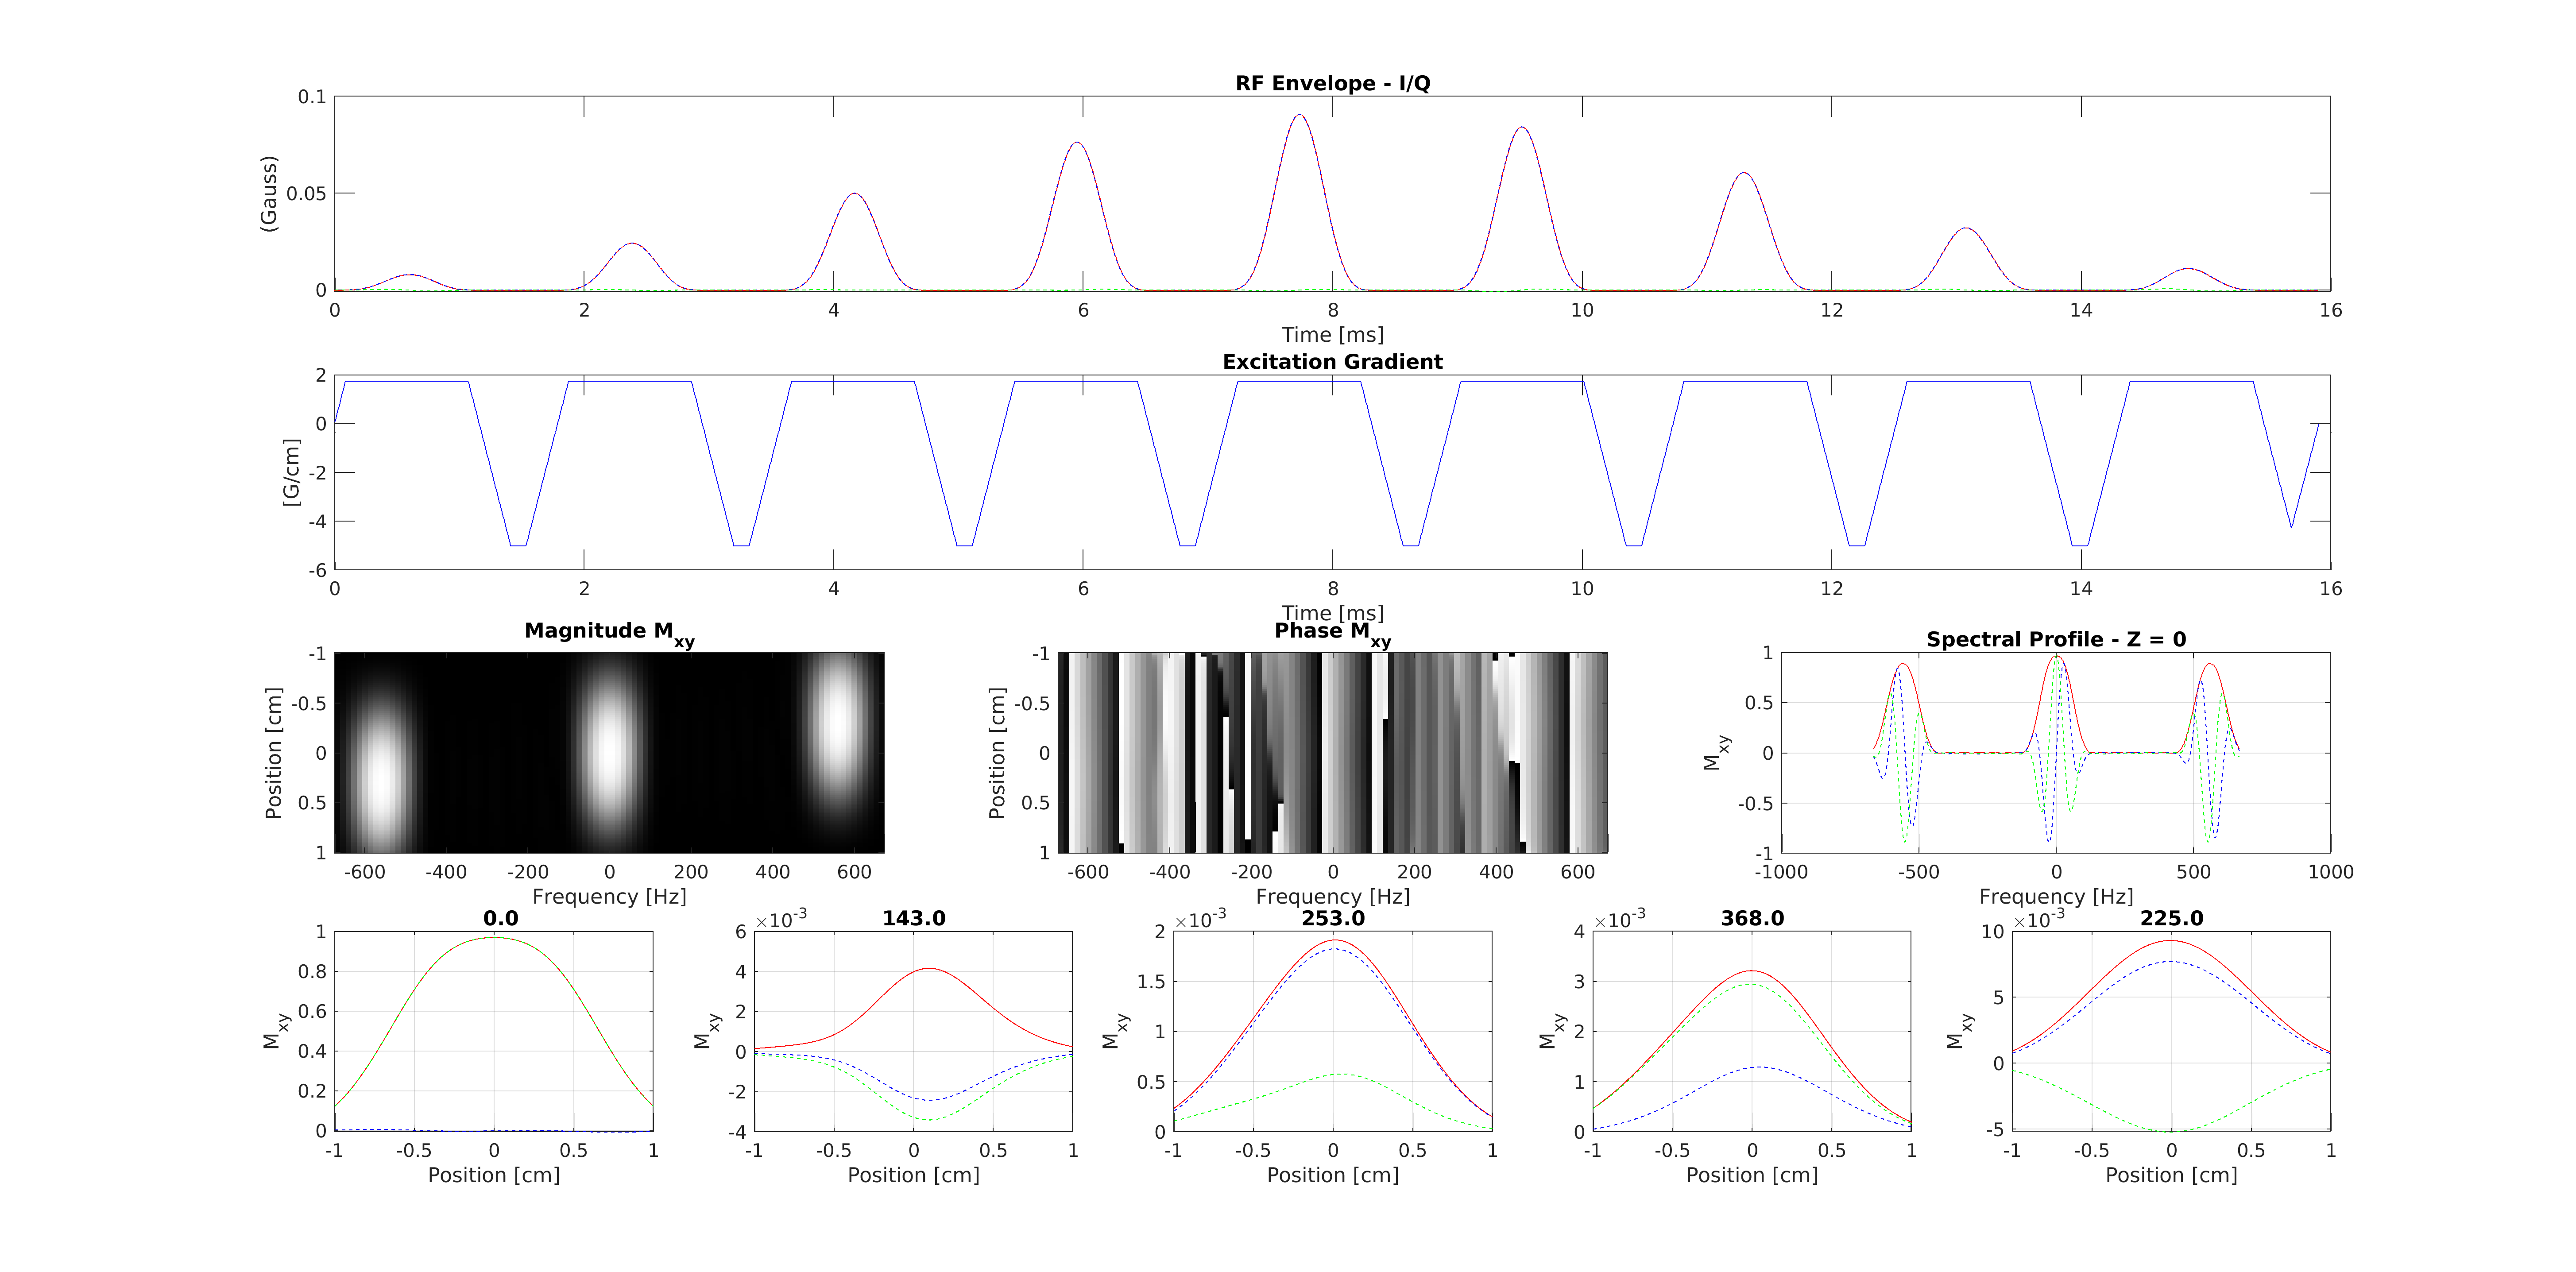

In [ ]:
% Next step, can you reduce the transition band?

## Exercise: Design a Multiband SPSP RF Pulse for C2-pyruvate

In [ ]:
% Design a multiband pulse for a spectroscopy C2-pyruvate imaging on a 3T scanner. 

% Considering signal level of substrate is high, using 20degree flip angle to excite C2-pyruvate, and using 30degree flip angle for the metabolic products.
% Constraint signal level of C2-pyruvate hydrate.

% The peaks include C2-pyruvate (0Hz), C5-glutamate (767.8Hz), C1-citrate (851.3Hz), C1-Acetoacetate (976.6Hz), C1-ALCAR (1037.6Hz), 
% C1-pyruvate doublelet (1105.1Hz), C2-pyruvate hydrate (3578.7Hz), C2-lactate doublelet (4410.8Hz).

% Considering B0 inhomogeneity when setting passband frequency

In [ ]:
% GENERAL PULSE PARAMETERS
ss_type = 'EP Whole';  
ptype = 'ex';  % excitation pulse
opt = ss_opt({'Nucleus', 'Carbon', ...
	      'Max Duration', 25e-3, ...
          'Spect Correct', 1});
      
% SPECTRAL PULSE PARAMETERS 
B0 = 3e4; % G
df = 0.5e-6 * B0 * SS_GAMMA; 
% metabolite			frequency (Hz)		    freq bandwidth (Hz)		flip angle (deg)	allowed ripple
mets(1).name = 'pyr'; 	mets(1).f = 0; 	mets(1).df = 2*df; 		mets(1).ang = 15; 	mets(1).d = .005;
mets(2).name = 'glut'; 	mets(2).f = 767.8; 	mets(2).df = 2.5*df; 		mets(2).ang = 30; 	mets(2).d = .01;
mets(3).name = 'Cit'; 	mets(3).f = 851.3; 	mets(3).df = 2.5*df; 	mets(3).ang = 30; 	mets(3).d = .01;
mets(4).name = 'Acet'; 	mets(4).f = 986.2; 	mets(4).df = 2.5*df; 	mets(4).ang = 30; 	mets(4).d = .01;
mets(5).name = 'carn'; 	mets(5).f = 1053.7; 	mets(5).df = 2.5*df; 		mets(5).ang = 30; 	mets(5).d = .01;
mets(6).name = 'c1pyr'; mets(6).f = 1124.4; 	mets(6).df = 2.5*df; 		mets(6).ang = 30; 	mets(6).d = .01;
mets(7).name = 'hyd'; 	mets(7).f = 3572.3; 	mets(7).df = 2*df; 		mets(7).ang = 0; 	mets(7).d = .005;
mets(8).name = 'lac'; 	mets(8).f = 4385.1; 	mets(8).df = 4*df; 	mets(8).ang = 30; 	mets(8).d = .005;

% create vectors of angles, ripples, and band edges for input to pulse design
[fspec, a_angs, d] = create_freq_specs(mets);
fctr = 0;  % force pulse design to optimize for center of frequency specification
s_ftype = 'min';  % minimimum-phase spectral filter

% SPATIAL PULSE PARAMETERS
z_thk = 4;  % thickness (cm)
z_tb = 2; % time-bandwidth
z_ftype='ls';  % least-squares filter design
z_d1 = 0.05;  z_d2 = 0.05;  % slice profile pass and stop-band ripples, respectively

% DESIGN THE PULSE!
[g,rf,fs,z,f,mxy] = ...
    ss_design(z_thk, z_tb, [z_d1 z_d2], fspec, a_angs, d, ptype, ...
	      z_ftype, s_ftype, ss_type, fctr);
set(gcf,'Name', '[1-13C]pyr+13C-urea Multiband');

In [ ]:
Which pulse would you like to use? (leave empty for shortest pulse) 2
Returning Fs: 3125.0 B1: 0.621G Power: 7.546e-05 G^2 ms Dur:  4.7ms

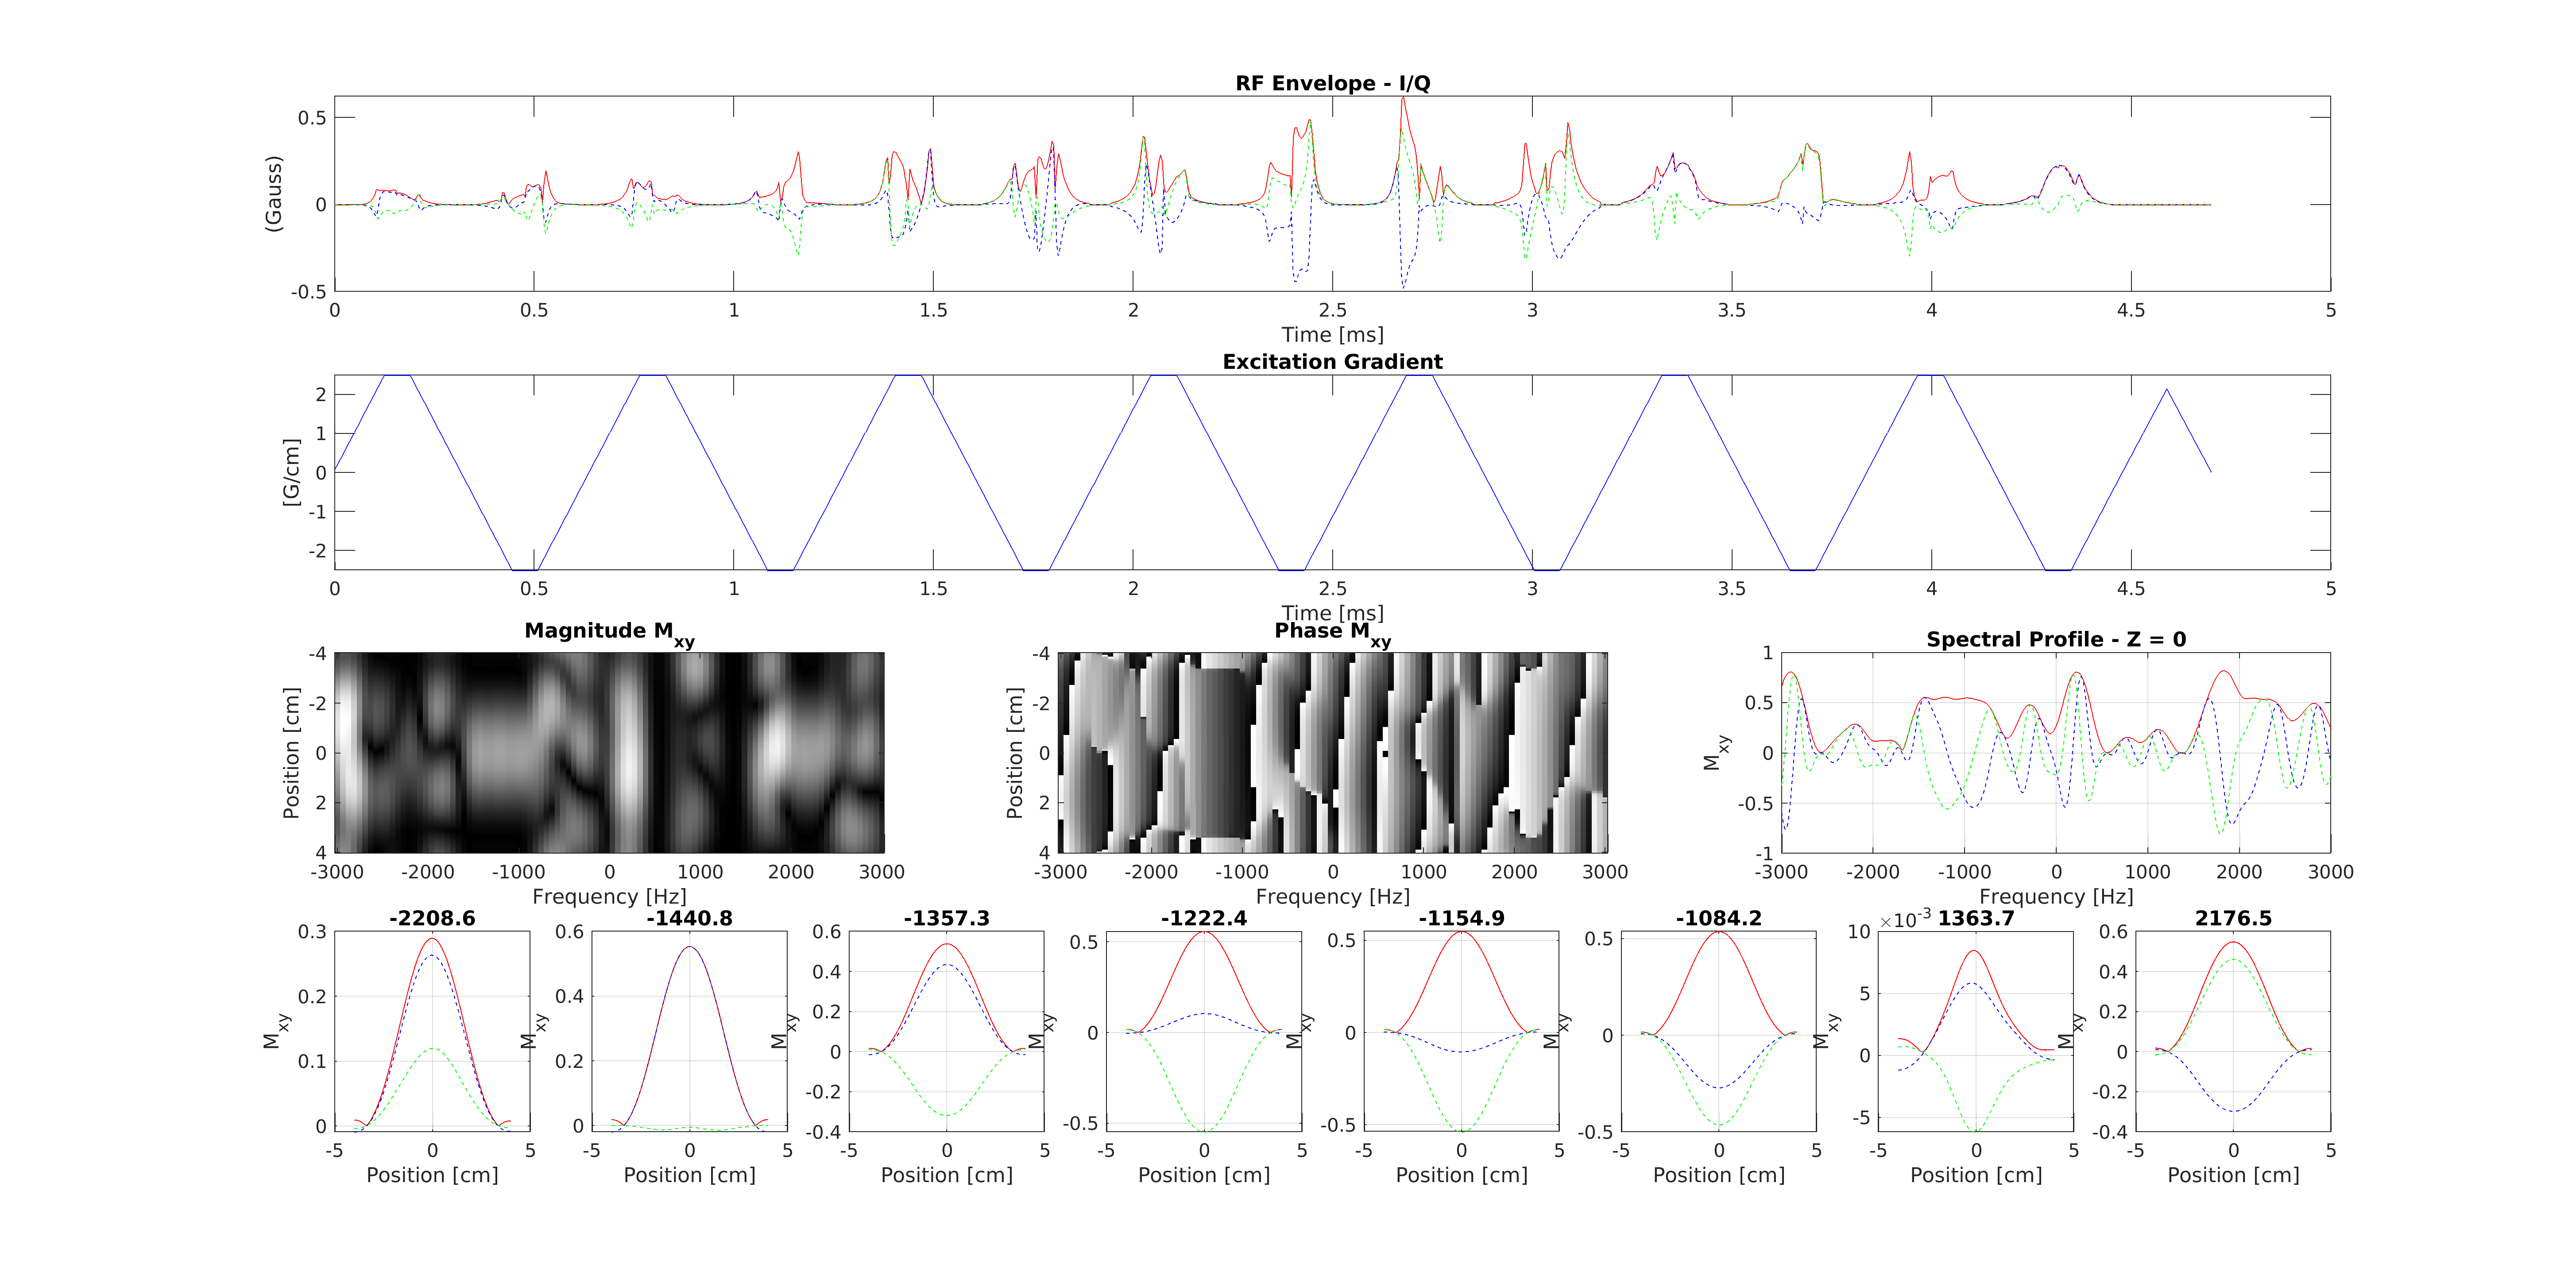

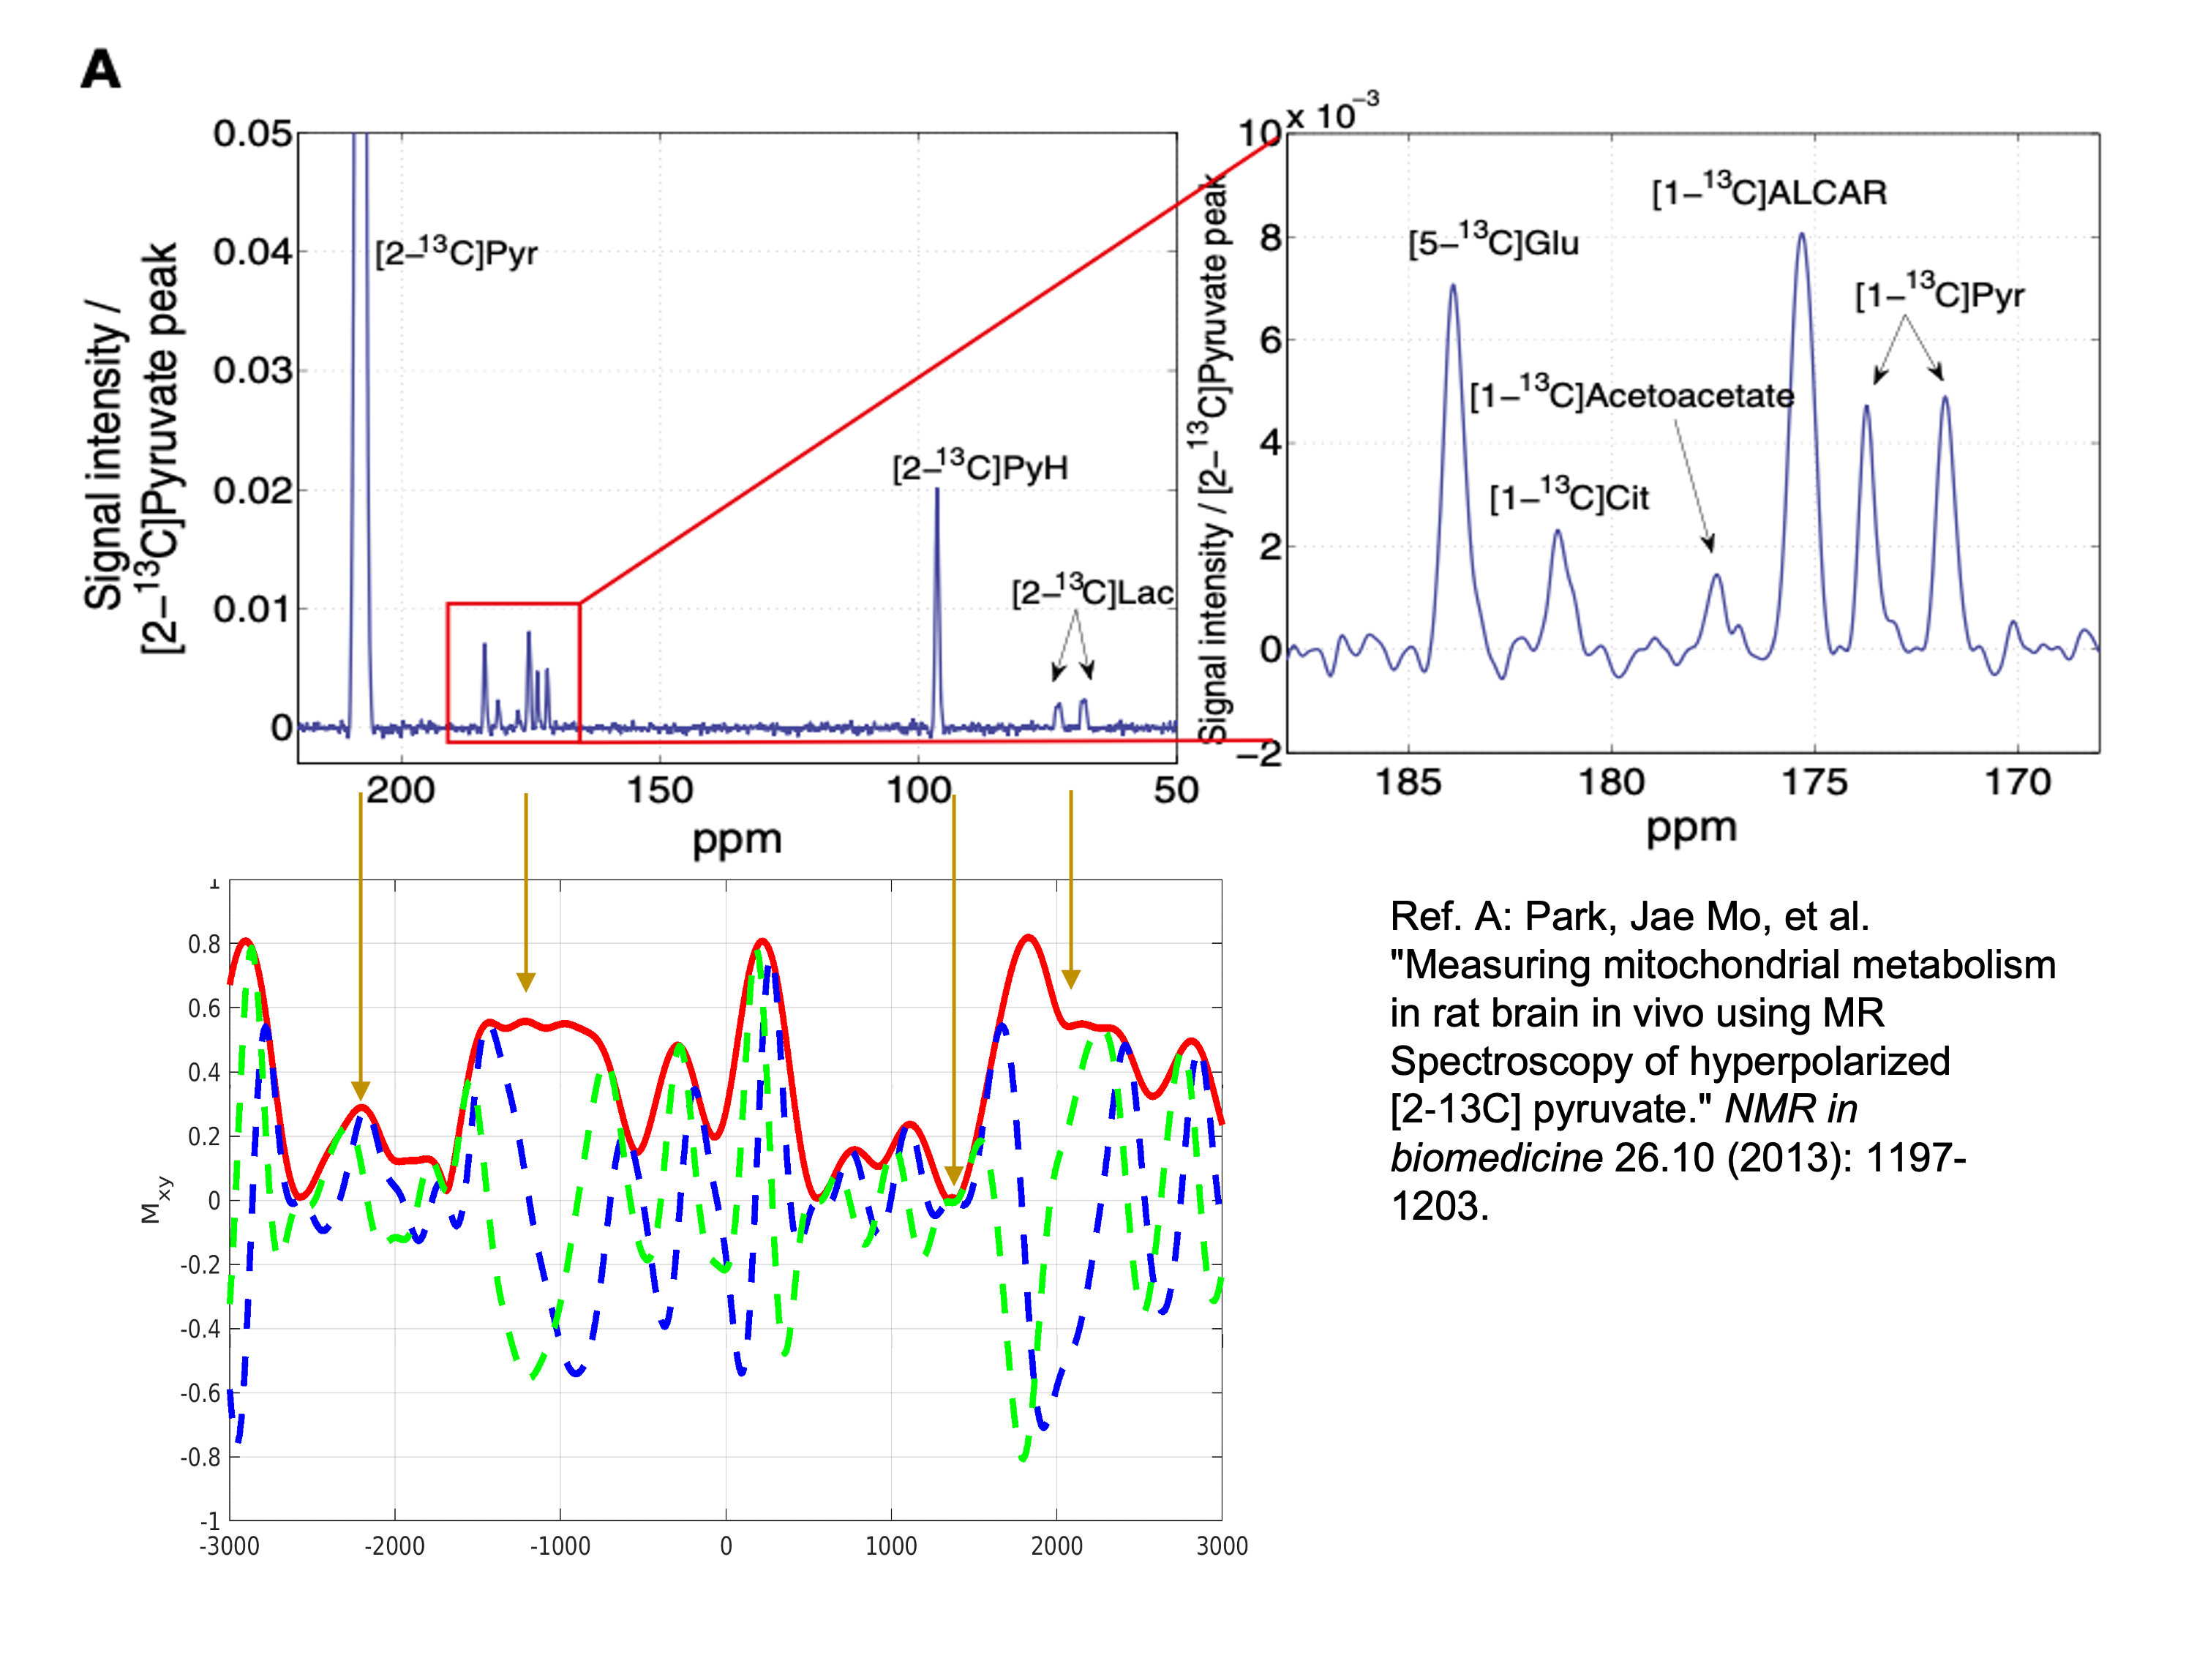

In [ ]:
% Next step, can you also excite C2-pyruvate hydrate with a 30degree flip angle?